In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso


import warnings
warnings.filterwarnings('ignore')

In [2]:
housing_data = pd.read_csv('train_adv_regression_assignment.csv')
housing_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
# ID variable has no significance and hence being dropped
housing_data = housing_data.drop('Id', axis = 1)
housing_data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [4]:
housing_data.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

In [5]:
#numerical_vars = []

#categorical_vars = []

missing_values = {}

for (column_name, coulmn_data) in housing_data.iteritems():
    missing_values[column_name] = housing_data[column_name].isna().sum()

In [6]:
print(missing_values)

{'MSSubClass': 0, 'MSZoning': 0, 'LotFrontage': 259, 'LotArea': 0, 'Street': 0, 'Alley': 1369, 'LotShape': 0, 'LandContour': 0, 'Utilities': 0, 'LotConfig': 0, 'LandSlope': 0, 'Neighborhood': 0, 'Condition1': 0, 'Condition2': 0, 'BldgType': 0, 'HouseStyle': 0, 'OverallQual': 0, 'OverallCond': 0, 'YearBuilt': 0, 'YearRemodAdd': 0, 'RoofStyle': 0, 'RoofMatl': 0, 'Exterior1st': 0, 'Exterior2nd': 0, 'MasVnrType': 8, 'MasVnrArea': 8, 'ExterQual': 0, 'ExterCond': 0, 'Foundation': 0, 'BsmtQual': 37, 'BsmtCond': 37, 'BsmtExposure': 38, 'BsmtFinType1': 37, 'BsmtFinSF1': 0, 'BsmtFinType2': 38, 'BsmtFinSF2': 0, 'BsmtUnfSF': 0, 'TotalBsmtSF': 0, 'Heating': 0, 'HeatingQC': 0, 'CentralAir': 0, 'Electrical': 1, '1stFlrSF': 0, '2ndFlrSF': 0, 'LowQualFinSF': 0, 'GrLivArea': 0, 'BsmtFullBath': 0, 'BsmtHalfBath': 0, 'FullBath': 0, 'HalfBath': 0, 'BedroomAbvGr': 0, 'KitchenAbvGr': 0, 'KitchenQual': 0, 'TotRmsAbvGrd': 0, 'Functional': 0, 'Fireplaces': 0, 'FireplaceQu': 690, 'GarageType': 81, 'GarageYrBlt':

In [7]:
housing_data['MSSubClass'] = housing_data['MSSubClass'].apply(str)

In [8]:
numerical_vars=housing_data.select_dtypes(include=['int64','float64']).columns.tolist()

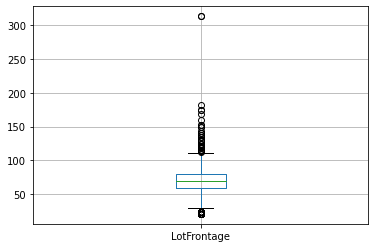

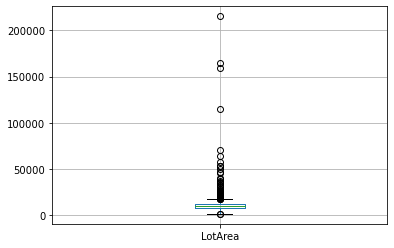

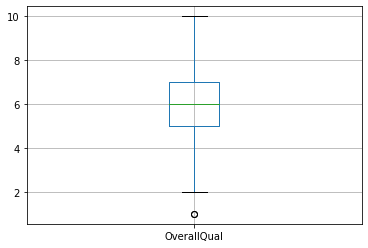

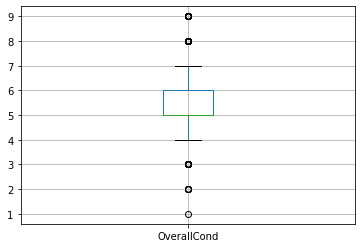

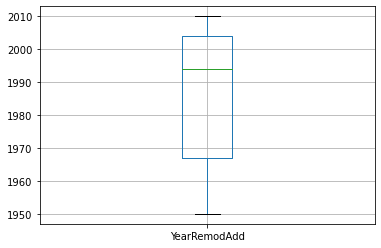

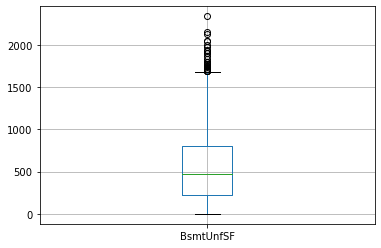

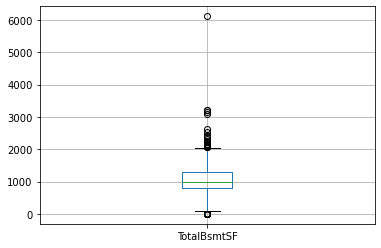

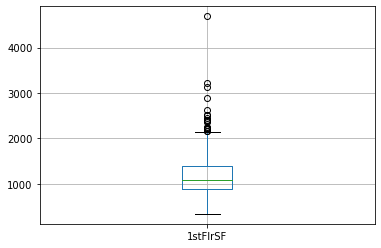

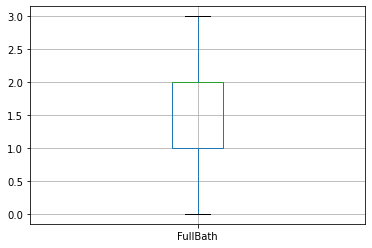

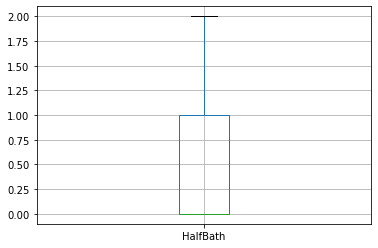

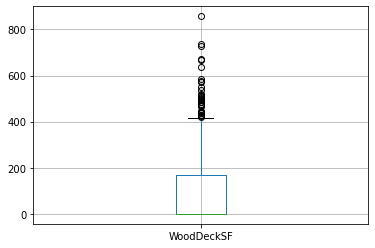

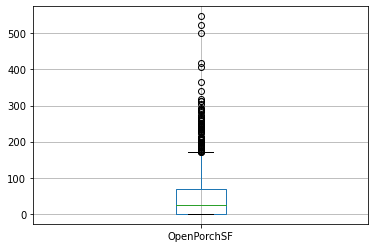

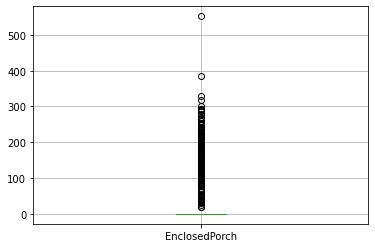

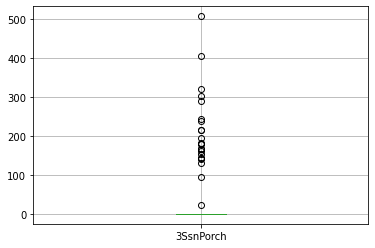

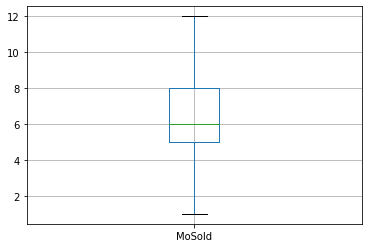

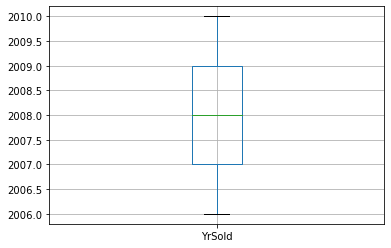

In [9]:
for col in numerical_vars:
    plt.figure()
    housing_data.boxplot(column = col)
    plt.show()

In [10]:
housing_data['LotFrontage'].fillna(housing_data['LotFrontage'].median(),inplace = True)
housing_data['Alley'].fillna('No_Alley_Access', inplace = True)
housing_data['MasVnrType'].fillna(housing_data['MasVnrType'].mode()[0],inplace = True)
housing_data['MasVnrArea'].fillna(housing_data['MasVnrArea'].mode()[0],inplace = True)
housing_data['BsmtQual'].fillna('No_Basement', inplace = True)
housing_data['BsmtCond'].fillna('No_Basement', inplace = True)
housing_data['BsmtExposure'].fillna('No_Basement', inplace = True)
housing_data['BsmtFinType1'].fillna('No_Basement', inplace = True)
housing_data['BsmtFinType2'].fillna('No_Basement', inplace = True)
housing_data['Electrical'].fillna(housing_data['Electrical'].mode()[0],inplace = True)
housing_data['FireplaceQu'].fillna('No_Fireplace', inplace = True)
housing_data['GarageType'].fillna('No_Garage', inplace = True)
housing_data['GarageYrBlt'].fillna(0, inplace = True)
housing_data['GarageFinish'].fillna('No_Garage', inplace = True)
housing_data['GarageQual'].fillna('No_Garage', inplace = True)
housing_data['GarageCond'].fillna('No_Garage', inplace = True)
housing_data['PoolQC'].fillna('No_Pool', inplace = True)
housing_data['Fence'].fillna('No_Fence', inplace = True)
housing_data['MiscFeature'].fillna('No_Misc_Features', inplace = True)

In [11]:
missing_values_post_imputation = {}

for (column_name, coulmn_data) in housing_data.iteritems():
    missing_values_post_imputation[column_name] = housing_data[column_name].isna().sum()

print(missing_values_post_imputation)

{'MSSubClass': 0, 'MSZoning': 0, 'LotFrontage': 0, 'LotArea': 0, 'Street': 0, 'Alley': 0, 'LotShape': 0, 'LandContour': 0, 'Utilities': 0, 'LotConfig': 0, 'LandSlope': 0, 'Neighborhood': 0, 'Condition1': 0, 'Condition2': 0, 'BldgType': 0, 'HouseStyle': 0, 'OverallQual': 0, 'OverallCond': 0, 'YearBuilt': 0, 'YearRemodAdd': 0, 'RoofStyle': 0, 'RoofMatl': 0, 'Exterior1st': 0, 'Exterior2nd': 0, 'MasVnrType': 0, 'MasVnrArea': 0, 'ExterQual': 0, 'ExterCond': 0, 'Foundation': 0, 'BsmtQual': 0, 'BsmtCond': 0, 'BsmtExposure': 0, 'BsmtFinType1': 0, 'BsmtFinSF1': 0, 'BsmtFinType2': 0, 'BsmtFinSF2': 0, 'BsmtUnfSF': 0, 'TotalBsmtSF': 0, 'Heating': 0, 'HeatingQC': 0, 'CentralAir': 0, 'Electrical': 0, '1stFlrSF': 0, '2ndFlrSF': 0, 'LowQualFinSF': 0, 'GrLivArea': 0, 'BsmtFullBath': 0, 'BsmtHalfBath': 0, 'FullBath': 0, 'HalfBath': 0, 'BedroomAbvGr': 0, 'KitchenAbvGr': 0, 'KitchenQual': 0, 'TotRmsAbvGrd': 0, 'Functional': 0, 'Fireplaces': 0, 'FireplaceQu': 0, 'GarageType': 0, 'GarageYrBlt': 0, 'GarageFi

In [12]:
len(housing_data)

1460

In [13]:
housing_data = housing_data[housing_data['LotFrontage']<300]
housing_data = housing_data[housing_data['LotArea']<200000]
housing_data = housing_data[housing_data['BsmtFinSF1']<3000]
housing_data = housing_data[housing_data['BsmtFinSF2']<1200]
housing_data = housing_data[housing_data['TotalBsmtSF']<4000]
housing_data = housing_data[housing_data['1stFlrSF']<3500]

In [14]:
len(housing_data)

1456

In [15]:
housing_data['MSSubClass'] = housing_data['MSSubClass'].apply(str)

In [16]:
numerical_vars=housing_data.select_dtypes(include=['int64','float64']).columns.tolist()

In [17]:
plt.figure()
sns.pairplot(housing_data, vars = numerical_vars)
plt.show()

<Figure size 432x288 with 0 Axes>

In [18]:
categorical_vars=housing_data.select_dtypes(include=['object','category']).columns.tolist()

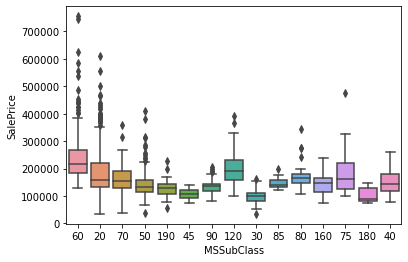

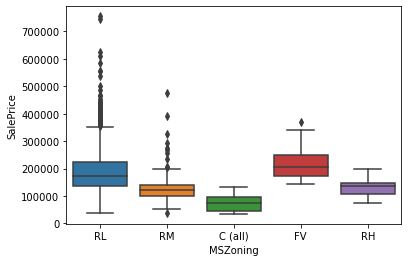

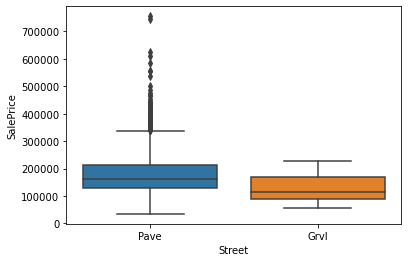

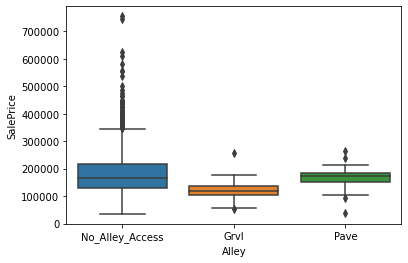

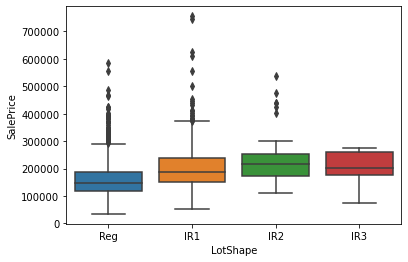

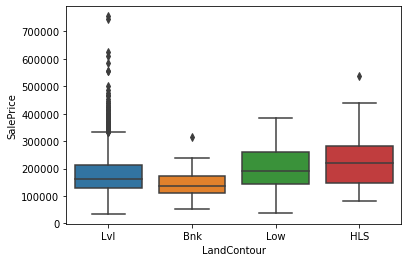

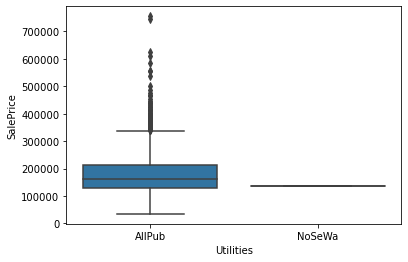

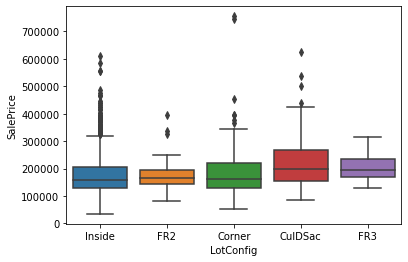

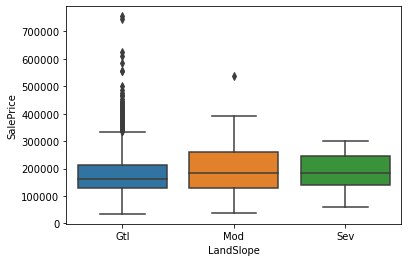

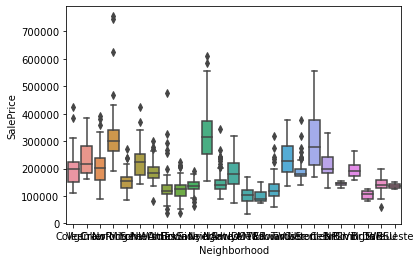

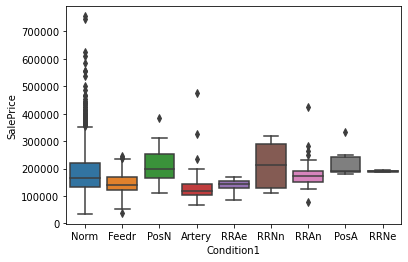

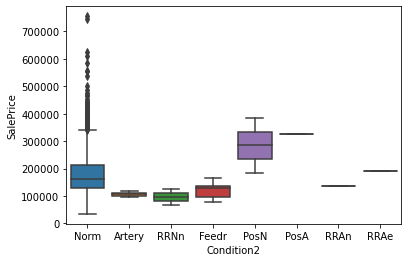

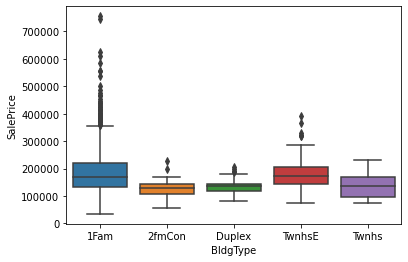

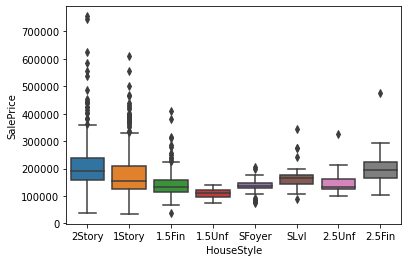

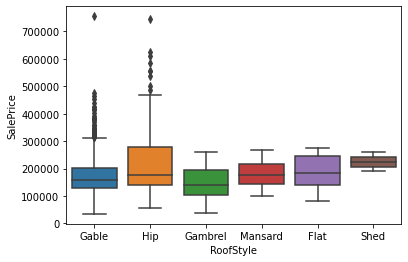

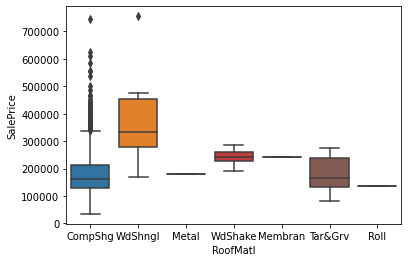

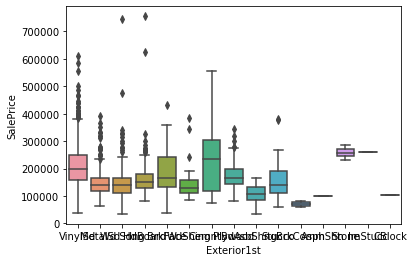

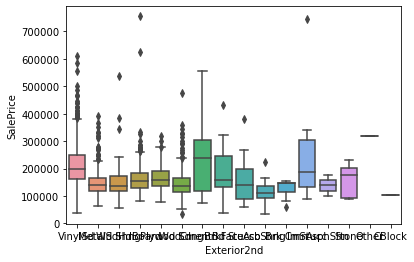

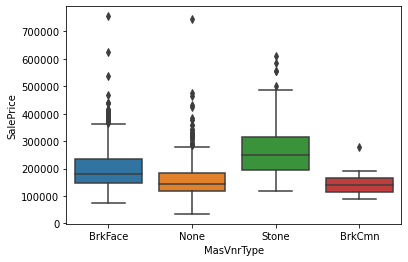

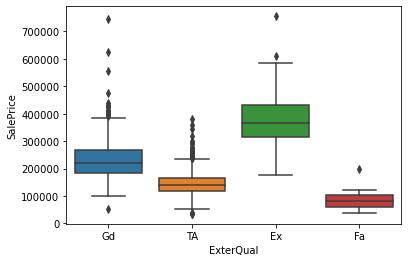

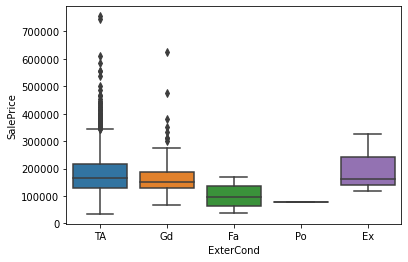

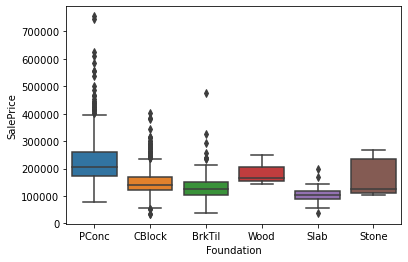

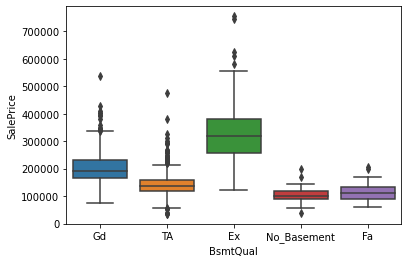

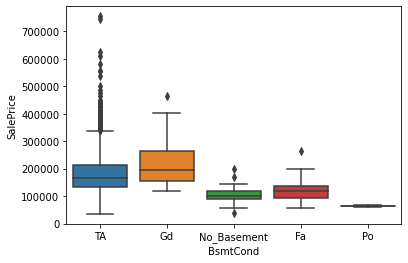

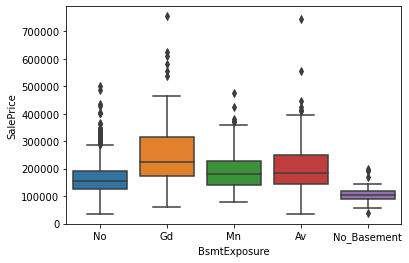

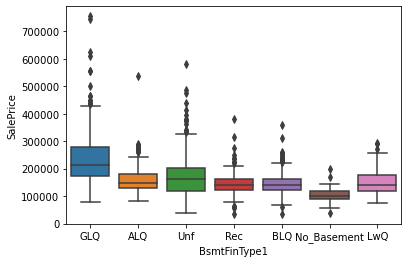

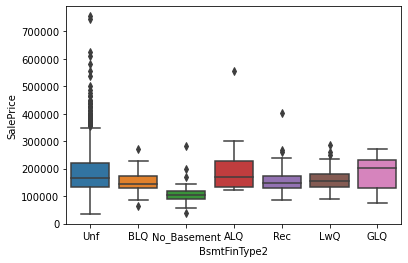

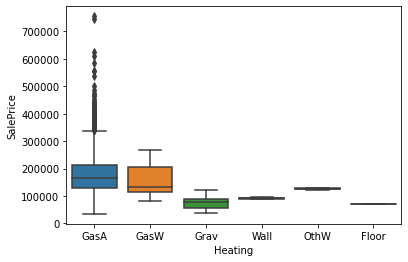

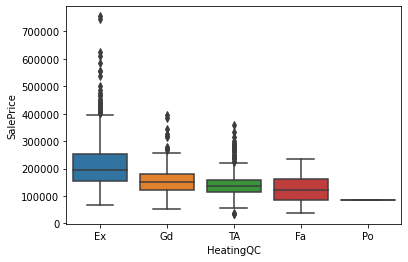

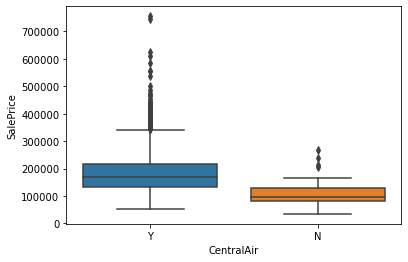

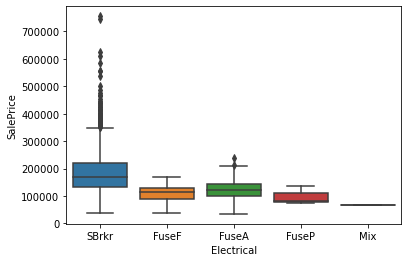

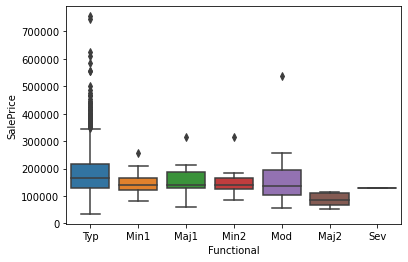

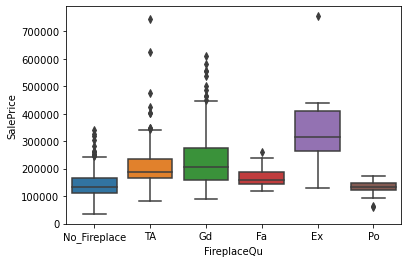

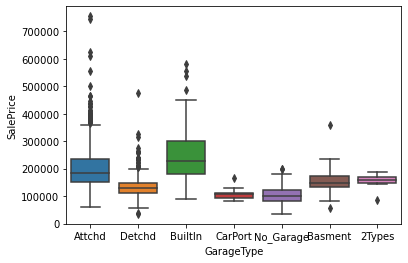

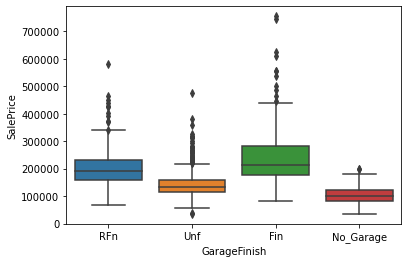

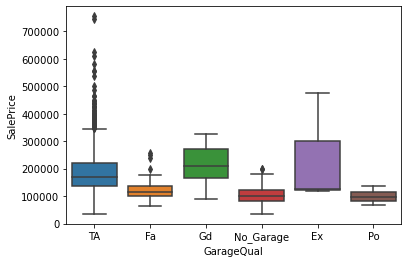

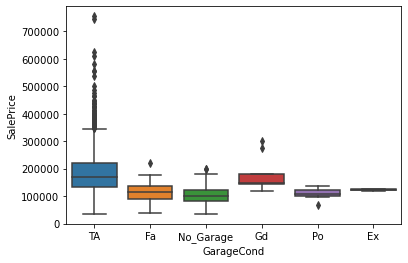

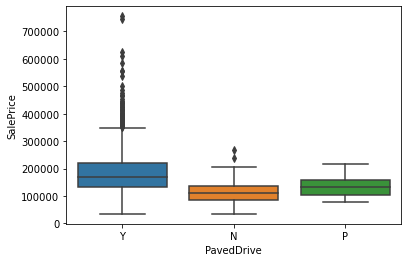

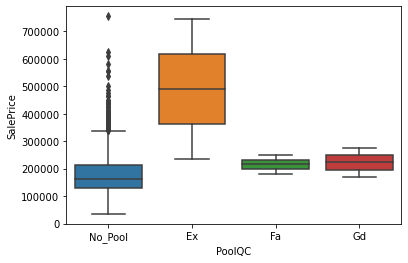

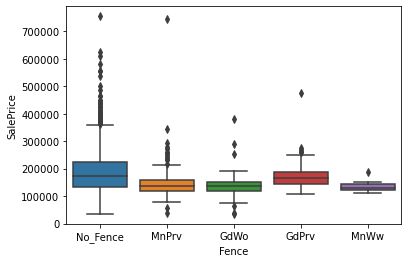

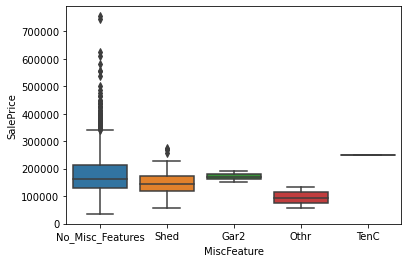

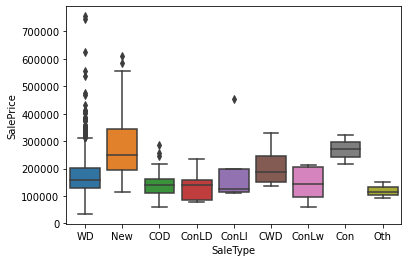

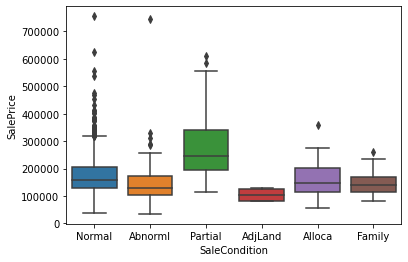

In [19]:
for column in categorical_vars:
    plt.figure()
    sns.boxplot(x = housing_data[column], y = 'SalePrice', data = housing_data)
    plt.show()

In [20]:
remove_columns = []
for column in categorical_vars:
    if (np.max(housing_data[column].value_counts(normalize=True)) > 0.9):
        remove_columns.append(column)
print(remove_columns)

housing_data.drop(remove_columns, axis = 1, inplace = True)

['Street', 'Alley', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageCond', 'PavedDrive', 'PoolQC', 'MiscFeature']


In [21]:
housing_data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0         60       RL         65.0     8450      Reg         Lvl    Inside   
1         20       RL         80.0     9600      Reg         Lvl       FR2   
2         60       RL         68.0    11250      IR1         Lvl    Inside   
3         70       RL         60.0     9550      IR1         Lvl    Corner   
4         60       RL         84.0    14260      IR1         Lvl       FR2   

  Neighborhood Condition1 BldgType  ... 3SsnPorch  ScreenPorch  PoolArea  \
0      CollgCr       Norm     1Fam  ...         0            0         0   
1      Veenker      Feedr     1Fam  ...         0            0         0   
2      CollgCr       Norm     1Fam  ...         0            0         0   
3      Crawfor       Norm     1Fam  ...         0            0         0   
4      NoRidge       Norm     1Fam  ...         0            0         0   

      Fence  MiscVal MoSold YrSold SaleType SaleCondition  SalePrice  
0  No_Fence        0      2   2008       WD        Normal     208500  
1  No_Fence        0      5   2007       WD        Normal     181500  
2  No_Fence        0      9   2008       WD        Normal     223500  
3  No_Fence        0      2   2006       WD       Abnorml     140000  
4  No_Fence        0     12   2008       WD        Normal     250000  

[5 rows x 66 columns]

In [22]:
plt.figure(figsize=(40,40))
sns.set(font_scale=1)
sns.heatmap(housing_data.corr(), annot = True)
plt.show()

In [23]:
print(categorical_vars)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [24]:
housing_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'Fence', 'MiscVal', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 

In [25]:
grades = {"Ex" : 5, "Gd" : 4, "TA" : 3, "Fa" : 2, "Po" : 1}
grades_bsmt = {"Ex" : 5, "Gd" : 4, "TA" : 3, "Fa" : 2, "Po" : 1, "No_Basement" : 0}
grades_bsmt_exp = {"Gd" : 4, "Av" : 3, "Mn" : 2, "No" : 1, "No_Basement" : 0}
grades_bsmt_fin = {"GLQ" : 6, "ALQ" : 5, "BLQ" : 4, "Rec" : 3, "LwQ" : 2, "Unf" : 1, "No_Basement" : 0}
grades_fire = {"Ex" : 5, "Gd" : 4, "TA" : 3, "Fa" : 2, "Po" : 1, "No_Fireplace" : 0}
garage_type = {"2Types" : 6, "Attchd" : 5, "Basment" : 4, "BuiltIn" : 3, "CarPort" : 2, "Detchd" : 1, "No_Garage" : 0}
garage_finish = {"Fin" : 3, "RFn" : 2, "Unf" : 1, "No_Garage" : 0}
grades_garage = {"Ex" : 5, "Gd" : 4, "TA" : 3, "Fa" : 2, "Po" : 1, "No_Garage" : 0}
grades_fence = {"GdPrv" : 4, "MnPrv" : 3, "GdWo" : 2, "MnWw" : 1, "No_Fence" : 0}

In [26]:
housing_data['ExterQual'] = housing_data['ExterQual'].map(grades)
housing_data['ExterCond'] = housing_data['ExterCond'].map(grades)
housing_data['BsmtQual'] = housing_data['BsmtQual'].map(grades_bsmt)
housing_data['BsmtCond'] = housing_data['BsmtCond'].map(grades_bsmt)
housing_data['BsmtExposure'] = housing_data['BsmtExposure'].map(grades_bsmt_exp)
housing_data['BsmtFinType1'] = housing_data['BsmtFinType1'].map(grades_bsmt_fin)
housing_data['BsmtFinType2'] = housing_data['BsmtFinType2'].map(grades_bsmt_fin)
housing_data['HeatingQC'] = housing_data['HeatingQC'].map(grades)
housing_data['KitchenQual'] = housing_data['KitchenQual'].map(grades)
housing_data['FireplaceQu'] = housing_data['FireplaceQu'].map(grades_fire)
housing_data['GarageType'] = housing_data['GarageType'].map(garage_type)
housing_data['GarageFinish'] = housing_data['GarageFinish'].map(garage_finish)
housing_data['GarageQual'] = housing_data['GarageQual'].map(grades_garage)
housing_data['Fence'] = housing_data['Fence'].map(grades_fence)

In [27]:
import datetime

date = datetime.date.today()
year = int(date.strftime("%Y"))

In [28]:
housing_data['property_age'] = year - housing_data['YearBuilt']
housing_data['property_remodel_age'] = year - housing_data['YearRemodAdd']
housing_data['garage_age'] = year - housing_data['GarageYrBlt']
housing_data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0         60       RL         65.0     8450      Reg         Lvl    Inside   
1         20       RL         80.0     9600      Reg         Lvl       FR2   
2         60       RL         68.0    11250      IR1         Lvl    Inside   
3         70       RL         60.0     9550      IR1         Lvl    Corner   
4         60       RL         84.0    14260      IR1         Lvl       FR2   

  Neighborhood Condition1 BldgType  ... Fence  MiscVal  MoSold  YrSold  \
0      CollgCr       Norm     1Fam  ...     0        0       2    2008   
1      Veenker      Feedr     1Fam  ...     0        0       5    2007   
2      CollgCr       Norm     1Fam  ...     0        0       9    2008   
3      Crawfor       Norm     1Fam  ...     0        0       2    2006   
4      NoRidge       Norm     1Fam  ...     0        0      12    2008   

   SaleType SaleCondition SalePrice property_age property_remodel_age  \
0        WD        Normal    208500           19                   19   
1        WD        Normal    181500           46                   46   
2        WD        Normal    223500           21                   20   
3        WD       Abnorml    140000          107                   52   
4        WD        Normal    250000           22                   22   

   garage_age  
0        19.0  
1        46.0  
2        21.0  
3        24.0  
4        22.0  

[5 rows x 69 columns]

In [29]:
housing_data = housing_data.drop(['YearBuilt', 'YearRemodAdd','GarageYrBlt'], axis = 1)

In [30]:
categorical_vars=housing_data.select_dtypes(include=['object','category']).columns.tolist()
print(len(categorical_vars))

16


In [31]:
for col in categorical_vars:
    dummy_var = pd.get_dummies(housing_data[col], drop_first= True, prefix = col)
    housing_data = pd.concat([housing_data,dummy_var], axis=1)
    housing_data.drop(col, axis=1, inplace=True)

housing_data.head()
#len(housing_data.columns)

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
0         65.0     8450            7            5       196.0          4   
1         80.0     9600            6            8         0.0          3   
2         68.0    11250            7            5       162.0          4   
3         60.0     9550            7            5         0.0          3   
4         84.0    14260            8            5       350.0          4   

   ExterCond  BsmtQual  BsmtCond  BsmtExposure  ...  SaleType_ConLI  \
0          3         4         3             1  ...               0   
1          3         4         3             4  ...               0   
2          3         4         3             2  ...               0   
3          3         3         4             1  ...               0   
4          3         4         3             3  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 176 columns]

In [32]:
numerical_vars=housing_data.select_dtypes(include=['int64','float64']).columns.tolist()
print(len(numerical_vars))

50


In [33]:
df_train, df_test = train_test_split(housing_data, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(1019, 176)
(437, 176)


In [34]:
scaler = MinMaxScaler()
df_train[numerical_vars] = scaler.fit_transform(df_train[numerical_vars])
df_train.head()

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
114      0.248447  0.035433     0.555556        0.875    0.000000   0.333333   
1056     0.136646  0.034164     0.666667        0.500    0.150000   0.666667   
367      0.496894  0.047021     0.555556        0.500    0.190625   0.333333   
308      0.298137  0.066582     0.333333        0.500    0.000000   0.333333   
1341     0.279503  0.074873     0.555556        0.500    0.000000   0.333333   

      ExterCond  BsmtQual  BsmtCond  BsmtExposure  ...  SaleType_ConLI  \
114    0.333333       0.6      0.75          0.25  ...               0   
1056   0.333333       0.8      0.75          0.75  ...               0   
367    0.333333       0.8      0.75          1.00  ...               0   
308    0.333333       0.6      0.75          0.25  ...               0   
1341   0.333333       0.8      0.75          0.25  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
114                0             0             0            1   
1056               0             0             0            1   
367                0             0             0            1   
308                0             0             0            1   
1341               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
114                       0                     0                     0   
1056                      0                     0                     0   
367                       0                     0                     0   
308                       0                     0                     0   
1341                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
114                      1                      0  
1056                     1                      0  
367                      1                      0  
308                      1                      0  
1341                     1                      0  

[5 rows x 176 columns]

In [36]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [37]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,30)
rfe = rfe.fit(X_train, y_train)

In [38]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 92),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 8),
 ('ExterQual', True, 1),
 ('ExterCond', True, 1),
 ('BsmtQual', False, 25),
 ('BsmtCond', True, 1),
 ('BsmtExposure', False, 21),
 ('BsmtFinType1', False, 135),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 65),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 104),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 80),
 ('BsmtHalfBath', False, 126),
 ('FullBath', False, 117),
 ('HalfBath', False, 118),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', False, 17),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 58),
 ('FireplaceQu', False, 59),
 ('GarageType', False, 93),
 ('GarageFinish', False, 125),
 ('GarageCars', False, 14),
 ('GarageArea', False, 76),
 ('GarageQual', False, 16),
 ('WoodDeckSF',

In [39]:
rfe_selected_columns = X_train.columns[rfe.support_]
rfe_selected_columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond',
       'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'PoolArea', 'property_age',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'Condition1_RRNe', 'Exterior1st_Stone', 'Exterior2nd_Stone',
       'Foundation_Wood', 'SaleType_Con', 'SaleType_New', 'SaleType_Oth',
       'SaleCondition_Partial'],
      dtype='object')

In [40]:
X_train_rfe = X_train[rfe_selected_columns]

In [41]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [42]:
lm = sm.OLS(y_train, X_train_rfe)
lr_model = lm.fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     300.1
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:32:29   Log-Likelihood:                 1938.9
No. Observations:                1019   AIC:                            -3820.
Df Residuals:                     990   BIC:                            -3677.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

In [43]:
X_train_new = X_train_rfe.drop(['const'], axis = 1)
lm = sm.OLS(y_train, X_train_new)
lr_model = lm.fit()
print(lr_model.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              1398.
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                        0.00
Time:                        16:32:36   Log-Likelihood:                          1938.7
No. Observations:                1019   AIC:                                     -3821.
Df Residuals:                     991   BIC:                                     -3683.
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [44]:
X_train_new = X_train_new.drop(['Condition1_RRNe'], axis = 1)
lm = sm.OLS(y_train, X_train_new)
lr_model = lm.fit()
print(lr_model.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              1449.
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                        0.00
Time:                        16:32:45   Log-Likelihood:                          1937.9
No. Observations:                1019   AIC:                                     -3822.
Df Residuals:                     992   BIC:                                     -3689.
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [45]:
X_train_new = X_train_new.drop(['SaleType_Oth'], axis = 1)
lm = sm.OLS(y_train, X_train_new)
lr_model = lm.fit()
print(lr_model.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              1503.
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                        0.00
Time:                        16:32:51   Log-Likelihood:                          1937.0
No. Observations:                1019   AIC:                                     -3822.
Df Residuals:                     993   BIC:                                     -3694.
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [46]:
X_train_new = X_train_new.drop(['Exterior1st_Stone'], axis = 1)
lm = sm.OLS(y_train, X_train_new)
lr_model = lm.fit()
print(lr_model.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              1560.
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                        0.00
Time:                        16:33:01   Log-Likelihood:                          1935.4
No. Observations:                1019   AIC:                                     -3821.
Df Residuals:                     994   BIC:                                     -3698.
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [47]:
X_train_new = X_train_new.drop(['Exterior2nd_Stone'], axis = 1)
lm = sm.OLS(y_train, X_train_new)
lr_model = lm.fit()
print(lr_model.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              1622.
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                        0.00
Time:                        16:33:11   Log-Likelihood:                          1934.0
No. Observations:                1019   AIC:                                     -3820.
Df Residuals:                     995   BIC:                                     -3702.
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [48]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Features    VIF
13              GrLivArea    inf
10               1stFlrSF    inf
12           LowQualFinSF    inf
11               2ndFlrSF    inf
6              BsmtFinSF1    inf
7              BsmtFinSF2    inf
8               BsmtUnfSF    inf
9             TotalBsmtSF    inf
1             OverallQual  44.57
16           TotRmsAbvGrd  43.65
25  SaleCondition_Partial  43.23
24           SaleType_New  43.21
5                BsmtCond  41.88
14           BedroomAbvGr  29.05
2             OverallCond  26.71
15           KitchenAbvGr  20.75
3               ExterQual  17.49
4               ExterCond  12.84
18           property_age   5.51
0                 LotArea   2.82
20   Neighborhood_NridgHt   1.45
19   Neighborhood_NoRidge   1.32
17               PoolArea   1.14
21   Neighborhood_StoneBr   1.10
22        Foundation_Wood   1.01
23           SaleType_Con   1.01


In [49]:
X_train_new = X_train_new.drop(['GrLivArea'], axis = 1)
lm = sm.OLS(y_train, X_train_new)
lr_model = lm.fit()
print(lr_model.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              1622.
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                        0.00
Time:                        16:33:24   Log-Likelihood:                          1934.0
No. Observations:                1019   AIC:                                     -3820.
Df Residuals:                     995   BIC:                                     -3702.
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [50]:
X_train_new = X_train_new.drop(['LowQualFinSF'], axis = 1)
lm = sm.OLS(y_train, X_train_new)
lr_model = lm.fit()
print(lr_model.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              1693.
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                        0.00
Time:                        16:33:33   Log-Likelihood:                          1933.5
No. Observations:                1019   AIC:                                     -3821.
Df Residuals:                     996   BIC:                                     -3708.
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [51]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Features    VIF
6              BsmtFinSF1    inf
7              BsmtFinSF2    inf
8               BsmtUnfSF    inf
9             TotalBsmtSF    inf
1             OverallQual  44.42
23  SaleCondition_Partial  43.22
22           SaleType_New  43.21
14           TotRmsAbvGrd  43.21
5                BsmtCond  41.85
10               1stFlrSF  34.55
12           BedroomAbvGr  28.95
2             OverallCond  26.45
13           KitchenAbvGr  20.69
3               ExterQual  17.49
4               ExterCond  12.79
11               2ndFlrSF   5.91
16           property_age   5.29
0                 LotArea   2.81
18   Neighborhood_NridgHt   1.45
17   Neighborhood_NoRidge   1.32
15               PoolArea   1.10
19   Neighborhood_StoneBr   1.10
20        Foundation_Wood   1.01
21           SaleType_Con   1.01


In [52]:
X_train_new = X_train_new.drop(['BsmtFinSF1'], axis = 1)
lm = sm.OLS(y_train, X_train_new)
lr_model = lm.fit()
print(lr_model.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              1693.
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                        0.00
Time:                        16:33:48   Log-Likelihood:                          1933.5
No. Observations:                1019   AIC:                                     -3821.
Df Residuals:                     996   BIC:                                     -3708.
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [53]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Features    VIF
1             OverallQual  44.42
8             TotalBsmtSF  43.57
22  SaleCondition_Partial  43.22
21           SaleType_New  43.21
13           TotRmsAbvGrd  43.21
5                BsmtCond  41.85
9                1stFlrSF  34.55
11           BedroomAbvGr  28.95
2             OverallCond  26.45
12           KitchenAbvGr  20.69
3               ExterQual  17.49
4               ExterCond  12.79
10               2ndFlrSF   5.91
15           property_age   5.29
7               BsmtUnfSF   3.98
0                 LotArea   2.81
17   Neighborhood_NridgHt   1.45
16   Neighborhood_NoRidge   1.32
6              BsmtFinSF2   1.25
14               PoolArea   1.10
18   Neighborhood_StoneBr   1.10
19        Foundation_Wood   1.01
20           SaleType_Con   1.01


In [54]:
X_train_new = X_train_new.drop(['OverallQual'], axis = 1)
lm = sm.OLS(y_train, X_train_new)
lr_model = lm.fit()
print(lr_model.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1615.
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                        0.00
Time:                        16:34:03   Log-Likelihood:                          1887.7
No. Observations:                1019   AIC:                                     -3731.
Df Residuals:                     997   BIC:                                     -3623.
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [55]:
X_train_new = X_train_new.drop(['Foundation_Wood'], axis = 1)
lm = sm.OLS(y_train, X_train_new)
lr_model = lm.fit()
print(lr_model.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1687.
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                        0.00
Time:                        16:34:10   Log-Likelihood:                          1885.8
No. Observations:                1019   AIC:                                     -3730.
Df Residuals:                     998   BIC:                                     -3626.
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [56]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Features    VIF
7             TotalBsmtSF  43.44
20  SaleCondition_Partial  43.22
19           SaleType_New  43.21
12           TotRmsAbvGrd  43.17
4                BsmtCond  38.28
8                1stFlrSF  33.00
10           BedroomAbvGr  28.91
1             OverallCond  25.29
11           KitchenAbvGr  20.45
2               ExterQual  14.39
3               ExterCond  12.79
9                2ndFlrSF   5.53
14           property_age   4.99
6               BsmtUnfSF   3.96
0                 LotArea   2.80
16   Neighborhood_NridgHt   1.43
15   Neighborhood_NoRidge   1.32
5              BsmtFinSF2   1.24
13               PoolArea   1.10
17   Neighborhood_StoneBr   1.09
18           SaleType_Con   1.01


In [57]:
X_train_new = X_train_new.drop(['TotalBsmtSF'], axis = 1)
lm = sm.OLS(y_train, X_train_new)
lr_model = lm.fit()
print(lr_model.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              1520.
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                        0.00
Time:                        16:34:22   Log-Likelihood:                          1809.5
No. Observations:                1019   AIC:                                     -3579.
Df Residuals:                     999   BIC:                                     -3480.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [58]:
X_train_new = X_train_new.drop(['TotRmsAbvGrd'], axis = 1)
lm = sm.OLS(y_train, X_train_new)
lr_model = lm.fit()
print(lr_model.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              1598.
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                        0.00
Time:                        16:34:28   Log-Likelihood:                          1808.4
No. Observations:                1019   AIC:                                     -3579.
Df Residuals:                    1000   BIC:                                     -3485.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [59]:
X_train_new = X_train_new.drop(['SaleCondition_Partial'], axis = 1)
lm = sm.OLS(y_train, X_train_new)
lr_model = lm.fit()
print(lr_model.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              1684.
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                        0.00
Time:                        16:34:35   Log-Likelihood:                          1807.0
No. Observations:                1019   AIC:                                     -3578.
Df Residuals:                    1001   BIC:                                     -3489.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [60]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                Features    VIF
1            OverallCond  24.77
4               BsmtCond  24.03
9           BedroomAbvGr  21.12
10          KitchenAbvGr  19.56
2              ExterQual  14.25
3              ExterCond  12.74
7               1stFlrSF  12.45
12          property_age   4.91
6              BsmtUnfSF   3.61
8               2ndFlrSF   3.19
0                LotArea   2.78
14  Neighborhood_NridgHt   1.40
17          SaleType_New   1.40
13  Neighborhood_NoRidge   1.27
5             BsmtFinSF2   1.23
15  Neighborhood_StoneBr   1.09
11              PoolArea   1.07
16          SaleType_Con   1.01


In [61]:
X_train_new = X_train_new.drop(['OverallCond'], axis = 1)
lm = sm.OLS(y_train, X_train_new)
lr_model = lm.fit()
print(lr_model.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              1672.
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                        0.00
Time:                        16:34:51   Log-Likelihood:                          1775.0
No. Observations:                1019   AIC:                                     -3516.
Df Residuals:                    1002   BIC:                                     -3432.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [62]:
X_train_new = X_train_new.drop(['ExterCond'], axis = 1)
lm = sm.OLS(y_train, X_train_new)
lr_model = lm.fit()
print(lr_model.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              1777.
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                        0.00
Time:                        16:34:58   Log-Likelihood:                          1774.7
No. Observations:                1019   AIC:                                     -3517.
Df Residuals:                    1003   BIC:                                     -3439.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [63]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                Features    VIF
7           BedroomAbvGr  20.86
8           KitchenAbvGr  19.21
2               BsmtCond  17.54
1              ExterQual  13.21
5               1stFlrSF  12.40
10          property_age   3.81
4              BsmtUnfSF   3.46
6               2ndFlrSF   3.18
0                LotArea   2.78
15          SaleType_New   1.40
12  Neighborhood_NridgHt   1.39
11  Neighborhood_NoRidge   1.27
3             BsmtFinSF2   1.23
13  Neighborhood_StoneBr   1.08
9               PoolArea   1.06
14          SaleType_Con   1.01


In [64]:
X_train_new = X_train_new.drop(['BedroomAbvGr'], axis = 1)
lm = sm.OLS(y_train, X_train_new)
lr_model = lm.fit()
print(lr_model.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              1874.
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                        0.00
Time:                        16:35:08   Log-Likelihood:                          1768.6
No. Observations:                1019   AIC:                                     -3507.
Df Residuals:                    1004   BIC:                                     -3433.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [65]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                Features    VIF
7           KitchenAbvGr  16.35
2               BsmtCond  16.33
1              ExterQual  13.11
5               1stFlrSF  11.26
9           property_age   3.75
4              BsmtUnfSF   3.41
0                LotArea   2.77
6               2ndFlrSF   2.28
14          SaleType_New   1.40
11  Neighborhood_NridgHt   1.38
10  Neighborhood_NoRidge   1.26
3             BsmtFinSF2   1.23
12  Neighborhood_StoneBr   1.07
8               PoolArea   1.06
13          SaleType_Con   1.01


In [66]:
X_train_new = X_train_new.drop(['KitchenAbvGr'], axis = 1)
lm = sm.OLS(y_train, X_train_new)
lr_model = lm.fit()
print(lr_model.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              1847.
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                        0.00
Time:                        16:35:23   Log-Likelihood:                          1727.0
No. Observations:                1019   AIC:                                     -3426.
Df Residuals:                    1005   BIC:                                     -3357.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [67]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                Features    VIF
2               BsmtCond  13.69
1              ExterQual  12.72
5               1stFlrSF   9.90
4              BsmtUnfSF   3.41
8           property_age   3.01
0                LotArea   2.77
6               2ndFlrSF   2.19
13          SaleType_New   1.40
10  Neighborhood_NridgHt   1.36
9   Neighborhood_NoRidge   1.24
3             BsmtFinSF2   1.22
11  Neighborhood_StoneBr   1.06
7               PoolArea   1.05
12          SaleType_Con   1.01


In [68]:
X_train_new = X_train_new.drop(['BsmtCond'], axis = 1)
lm = sm.OLS(y_train, X_train_new)
lr_model = lm.fit()
print(lr_model.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              1940.
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                        0.00
Time:                        16:35:35   Log-Likelihood:                          1714.3
No. Observations:                1019   AIC:                                     -3403.
Df Residuals:                    1006   BIC:                                     -3339.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [69]:
X_train_new = X_train_new.drop(['BsmtFinSF2'], axis = 1)
lm = sm.OLS(y_train, X_train_new)
lr_model = lm.fit()
print(lr_model.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              2098.
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                        0.00
Time:                        16:35:41   Log-Likelihood:                          1712.9
No. Observations:                1019   AIC:                                     -3402.
Df Residuals:                    1007   BIC:                                     -3343.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [70]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                Features   VIF
3               1stFlrSF  9.23
1              ExterQual  8.39
2              BsmtUnfSF  3.16
0                LotArea  2.73
6           property_age  2.26
4               2ndFlrSF  2.17
11          SaleType_New  1.40
8   Neighborhood_NridgHt  1.33
7   Neighborhood_NoRidge  1.22
9   Neighborhood_StoneBr  1.06
5               PoolArea  1.05
10          SaleType_Con  1.01


In [71]:
y_train_pred = lr_model.predict(X_train_new)

res = y_train - y_train_pred

plt.figure()
sns.distplot(res)
plt.show()

In [72]:
print(r2_score(y_train, y_train_pred))

0.835758027318457


In [73]:
rss = np.sum(np.square(y_train - y_train_pred))
print(rss)
mse = mean_squared_error(y_train, y_train_pred)
print(mse)
rmse = mse**0.5
print(rmse)

2.0683942834891287
0.002029827559851942
0.04505360762305214


In [74]:
df_test[numerical_vars] = scaler.transform(df_test[numerical_vars])
df_test.head()

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
1423     0.298137  0.111611     0.555556        0.750         0.0   0.666667   
434      0.000000  0.002531     0.333333        0.750         0.0   0.333333   
1030     0.298137  0.034348     0.444444        0.875         0.0   0.333333   
586      0.211180  0.053866     0.555556        0.750         0.0   0.333333   
1346     0.298137  0.118297     0.666667        0.750         0.0   0.333333   

      ExterCond  BsmtQual  BsmtCond  BsmtExposure  ...  SaleType_ConLI  \
1423   0.666667       0.8      0.75          0.75  ...               0   
434    0.666667       0.8      0.75          0.75  ...               0   
1030   0.333333       0.6      0.75          0.50  ...               0   
586    0.666667       0.6      1.00          0.50  ...               0   
1346   0.333333       0.6      0.75          0.25  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
1423               0             0             0            1   
434                0             0             0            1   
1030               0             0             0            1   
586                0             0             0            1   
1346               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1423                      0                     1                     0   
434                       0                     0                     0   
1030                      0                     0                     0   
586                       0                     0                     0   
1346                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
1423                     0                      0  
434                      1                      0  
1030                     1                      0  
586                      1                      0  
1346                     1                      0  

[5 rows x 176 columns]

In [75]:
X_train_new.columns

Index(['LotArea', 'ExterQual', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'PoolArea',
       'property_age', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'SaleType_Con', 'SaleType_New'],
      dtype='object')

In [76]:
y_test = df_test.pop('SalePrice')
X_test = df_test[['LotArea', 'ExterQual', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'PoolArea',
       'property_age', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'SaleType_Con', 'SaleType_New']]
X_test.head()

LotArea  ExterQual  BsmtUnfSF  1stFlrSF  2ndFlrSF  PoolArea  \
1423  0.111611   0.666667   0.298373  0.428818  0.303148   1.32973   
434   0.002531   0.333333   0.057791  0.102281  0.000000   0.00000   
1030  0.034348   0.333333   0.293664  0.212163  0.474576   0.00000   
586   0.053866   0.333333   0.000000  0.174153  0.000000   0.00000   
1346  0.118297   0.333333   0.514983  0.629578  0.000000   0.00000   

      property_age  Neighborhood_NoRidge  Neighborhood_NridgHt  \
1423      0.313869                     0                     0   
434       0.270073                     0                     0   
1030      0.678832                     0                     0   
586       0.664234                     0                     0   
1346      0.299270                     0                     0   

      Neighborhood_StoneBr  SaleType_Con  SaleType_New  
1423                     0             0             0  
434                      0             0             0  
1030                     0             0             0  
586                      0             0             0  
1346                     0             0             0

In [77]:
y_pred_test = lr_model.predict(X_test)

In [78]:
rsquare = r2_score(y_test, y_pred_test)
print(rsquare)

0.7206100275440531


In [79]:
lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

for i in lambdas:
    ridgecoef = PolynomialFeatures(1)
    
    X_poly_ridge = ridgecoef.fit_transform(X_train_new)
    ridgereg = Ridge(alpha = i)
    ridgereg.fit(X_poly_ridge, y_train)
    
    y_ridge_pred_train = ridgereg.predict(ridgecoef.fit_transform(X_train_new))
    y_ridge_pred_test = ridgereg.predict(ridgecoef.fit_transform(X_test))
    print("\nLambda :" + str(i) )
    print("Training r2 score = " + str(r2_score(y_train, y_ridge_pred_train)))
    print("Test r2 score = " + str(r2_score(y_test, y_ridge_pred_test)))


Lambda :0
Training r2 score = 0.8357580414693156
Test r2 score = 0.7206188090480865

Lambda :0.001
Training r2 score = 0.835758037886154
Test r2 score = 0.720648805702167

Lambda :0.01
Training r2 score = 0.8357576854543302
Test r2 score = 0.7209167315448148

Lambda :0.1
Training r2 score = 0.8357245758165158
Test r2 score = 0.7234070021557504

Lambda :1
Training r2 score = 0.8336154913818423
Test r2 score = 0.7371808701462332

Lambda :10
Training r2 score = 0.7848643733760439
Test r2 score = 0.7226903826096686

Lambda :100
Training r2 score = 0.5125438245528777
Test r2 score = 0.48626318128330115

Lambda :1000
Training r2 score = 0.11908692848339397
Test r2 score = 0.1135523608988862


In [81]:
#Ridge - Considering Lambda value of 0.1 for Ridge Regression
X_poly_ridge = ridgecoef.fit_transform(X_train_new)
ridgereg = Ridge(alpha = 0.1)
ridgereg.fit(X_poly_ridge, y_train)
    
y_ridge_pred_train = ridgereg.predict(ridgecoef.fit_transform(X_train_new))
y_ridge_pred_test = ridgereg.predict(ridgecoef.fit_transform(X_test))
print("Training r2 score = " + str(r2_score(y_train, y_ridge_pred_train)))
print("Test r2 score = " + str(r2_score(y_test, y_ridge_pred_test)))
print(ridgereg.coef_)

Training r2 score = 0.8357245758165158
Test r2 score = 0.7234070021557504
[ 0.          0.2262652   0.14077173 -0.04632589  0.41583019  0.18280495
  0.14060986 -0.08494482  0.07546959  0.05949108  0.0587293   0.08652849
  0.03757548]


In [82]:
lambdas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in lambdas:
    lassocoef = PolynomialFeatures(1)
    X_poly_lasso = lassocoef.fit_transform(X_train)
    lassoreg = Lasso(alpha = i)
    lassoreg.fit(X_poly_lasso, y_train)
    
    y_pred_lasso_train = lassoreg.predict(lassocoef.fit_transform(X_train))
    y_pred_lasso_test = lassoreg.predict(lassocoef.fit_transform(df_test))
    print("\nLambda :" + str(i) )
    print("Training r2 score = " + str(r2_score(y_train, y_pred_lasso_train)))
    print("Test r2 score = " + str(r2_score(y_test, y_pred_lasso_test)))


Lambda :0.001
Training r2 score = 0.8753372089607266
Test r2 score = 0.7974111316790584

Lambda :0.01
Training r2 score = 0.4061312503693332
Test r2 score = 0.3922638413380154

Lambda :0.1
Training r2 score = 0.0
Test r2 score = -0.0008821777453447144

Lambda :1
Training r2 score = 0.0
Test r2 score = -0.0008821777453447144

Lambda :10
Training r2 score = 0.0
Test r2 score = -0.0008821777453447144

Lambda :100
Training r2 score = 0.0
Test r2 score = -0.0008821777453447144

Lambda :1000
Training r2 score = 0.0
Test r2 score = -0.0008821777453447144


In [83]:
#Lasso - Considering Lambda value of 0.001 for Lasso Regression
lassocoef = PolynomialFeatures(1)
X_poly_lasso = lassocoef.fit_transform(X_train)
lassoreg = Lasso(alpha = 0.001)
lassoreg.fit(X_poly_lasso, y_train)
    
y_pred_lasso_train = lassoreg.predict(lassocoef.fit_transform(X_train))
y_pred_lasso_test = lassoreg.predict(lassocoef.fit_transform(df_test))
print("Training r2 score = " + str(r2_score(y_train, y_pred_lasso_train)))
print("Test r2 score = " + str(r2_score(y_test, y_pred_lasso_test)))
print(lassoreg.coef_)

Training r2 score = 0.8753372089607266
Test r2 score = 0.7974111316790584
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.13813104e-01
  0.00000000e+00  0.00000000e+00  5.19422906e-02 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  3.17446981e-02  0.00000000e+00
  6.82231980e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.40071438e-02  0.00000000e+00  3.08143622e-03  0.00000000e+00
 -0.00000000e+00  2.69191158e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  4.35178882e-02  0.00000000e+00  0.00000000e+00  1.91362064e-02
  0.00000000e+00  3.38722811e-03  2.65917413e-02  6.49594383e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -6.34373433e-03  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  1.01538273e-02  0.00000000e+00 -0.00000000e+00
  0.00000000e+00

In [85]:
#Ridge - Considering Lambda value of 0.2 for Ridge Regression - Question 1
X_poly_ridge = ridgecoef.fit_transform(X_train_new)
ridgereg = Ridge(alpha = 0.2)
ridgereg.fit(X_poly_ridge, y_train)
    
y_ridge_pred_train = ridgereg.predict(ridgecoef.fit_transform(X_train_new))
y_ridge_pred_test = ridgereg.predict(ridgecoef.fit_transform(X_test))
print("Training r2 score = " + str(r2_score(y_train, y_ridge_pred_train)))
print("Test r2 score = " + str(r2_score(y_test, y_ridge_pred_test)))
print(ridgereg.coef_)
print(X_train_new.columns)

Training r2 score = 0.8356324470311727
Test r2 score = 0.7258206079856111
[ 0.          0.21803913  0.14098058 -0.04587368  0.4137062   0.18218841
  0.13486773 -0.08489761  0.07607378  0.05961115  0.05858618  0.08268081
  0.03759314]
Index(['LotArea', 'ExterQual', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'PoolArea',
       'property_age', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'SaleType_Con', 'SaleType_New'],
      dtype='object')


In [88]:
#Lasso - Considering Lambda value of 0.002 for Lasso Regression - Question 2
lassocoef = PolynomialFeatures(1)
X_poly_lasso = lassocoef.fit_transform(X_train)
lassoreg = Lasso(alpha = 0.002)
lassoreg.fit(X_poly_lasso, y_train)
    
y_pred_lasso_train = lassoreg.predict(lassocoef.fit_transform(X_train))
y_pred_lasso_test = lassoreg.predict(lassocoef.fit_transform(df_test))
print("Training r2 score = " + str(r2_score(y_train, y_pred_lasso_train)))
print("Test r2 score = " + str(r2_score(y_test, y_pred_lasso_test)))
print(lassoreg.coef_)
print(X_train.columns)

Training r2 score = 0.8428914121683881
Test r2 score = 0.7829900845080936
[ 0.          0.          0.          0.10024491  0.          0.
  0.05188095 -0.          0.          0.          0.02654485  0.
  0.0600647   0.          0.          0.          0.05113444  0.
  0.          0.         -0.          0.2109413   0.         -0.
  0.          0.          0.         -0.          0.04579816  0.
  0.          0.02785516  0.          0.00548348  0.02761145  0.
  0.          0.          0.         -0.          0.          0.
  0.         -0.         -0.         -0.          0.         -0.
 -0.00805005 -0.         -0.         -0.         -0.          0.00500376
 -0.         -0.         -0.         -0.          0.01637678  0.
 -0.         -0.         -0.         -0.          0.         -0.
  0.00350195 -0.00383107  0.         -0.         -0.00582388  0.
  0.         -0.          0.         -0.         -0.         -0.
  0.         -0.          0.          0.         -0.          0.
 -0.    